In [1]:
from google.colab import files
uploaded= files.upload()

Saving Covid Dataset.csv to Covid Dataset.csv


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import time
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report,confusion_matrix, roc_auc_score, mean_squared_error,r2_score, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.ensemble import RandomForestRegressor

In [42]:
# covid 19 - prediction of covid cases
# data gathering
# feature engineering/ data cleaning
# EDP
# visualisation (matplotlib + seaborn)
# model creation rfc
# model traing [target(covid), feature(breathing problem)]
# pedictiom/ testing
# evaluation msf
# output/objective

In [3]:
covid_data = pd.read_csv("Covid Dataset.csv")

covid_data

,Breathing Problem,Fever,Dry Cough,Sore throat,Running Nose,Asthma,Chronic Lung Disease,Headache,Heart Disease,Diabetes,...,Fatigue,Gastrointestinal,Abroad travel,Contact with COVID Patient,Attended Large Gathering,Visited Public Exposed Places,Family working in Public Exposed Places,Wearing Masks,Sanitization from Market,COVID-19
0,Yes,Yes,Yes,Yes,Yes,No,No,No,No,Yes,...,Yes,Yes,No,Yes,No,Yes,Yes,No,No,Yes
1,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,No,...,Yes,No,No,No,Yes,Yes,No,No,No,Yes
2,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,...,Yes,Yes,Yes,No,No,No,No,No,No,Yes
3,Yes,Yes,Yes,No,No,Yes,No,No,Yes,Yes,...,No,No,Yes,No,Yes,Yes,No,No,No,Yes
4,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,...,No,Yes,No,Yes,No,Yes,No,No,No,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5429,Yes,Yes,No,Yes,Yes,Yes,Yes,No,No,No,...,Yes,Yes,No,No,No,No,No,No,No,Yes
5430,Yes,Yes,Yes,No,Yes,Yes,No,Yes,No,Yes,...,Yes,No,No,No,No,No,No,No,No,Yes
5431,Yes,Yes,Yes,No,No,No,No,No,Yes,No,...,No,No,No,No,No,No,No,No,No,No
5432,Yes,Yes,Yes,No,Yes,No,No,Yes,Yes,No,...,No,No,No,No,No,No,No,No,No,No


In [27]:
print(covid_data.columns)

Index(['Breathing Problem', 'Fever', 'Dry Cough', 'Sore throat',
       'Running Nose', 'Asthma', 'Chronic Lung Disease', 'Headache',
       'Heart Disease', 'Diabetes', 'Hyper Tension', 'Fatigue ',
       'Gastrointestinal ', 'Abroad travel', 'Contact with COVID Patient',
       'Attended Large Gathering', 'Visited Public Exposed Places',
       'Family working in Public Exposed Places', 'COVID-19'],
      dtype='object')


In [28]:
print(covid_data.shape)

(5434, 19)


In [30]:
print(covid_data.info)

<bound method DataFrame.info of       Breathing Problem  Fever  Dry Cough  Sore throat  Running Nose  Asthma  \
0                     1      1          1            1             1       0   
1                     1      1          1            1             0       1   
2                     1      1          1            1             1       1   
3                     1      1          1            0             0       1   
4                     1      1          1            1             1       0   
...                 ...    ...        ...          ...           ...     ...   
5429                  1      1          0            1             1       1   
5430                  1      1          1            0             1       1   
5431                  1      1          1            0             0       0   
5432                  1      1          1            0             1       0   
5433                  1      1          1            0             1       1   

      C

In [4]:
yes_count = covid_data['COVID-19'].value_counts().get('Yes', 0)
print("Number of rows with 'Yes':", yes_count)

no_count = covid_data['COVID-19'].value_counts().get('No', 0)
print("Number of rows with 'no':", no_count)

Number of rows with 'Yes': 4383
Number of rows with 'no': 1051


In [5]:
covid_data.shape

covid_data.columns

covid_data.info()

covid_data.describe().T

covid_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5434 entries, 0 to 5433
Data columns (total 21 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   Breathing Problem                        5434 non-null   object
 1   Fever                                    5434 non-null   object
 2   Dry Cough                                5434 non-null   object
 3   Sore throat                              5434 non-null   object
 4   Running Nose                             5434 non-null   object
 5   Asthma                                   5434 non-null   object
 6   Chronic Lung Disease                     5434 non-null   object
 7   Headache                                 5434 non-null   object
 8   Heart Disease                            5434 non-null   object
 9   Diabetes                                 5434 non-null   object
 10  Hyper Tension                            5434 non-null   obj

,Breathing Problem,Fever,Dry Cough,Sore throat,Running Nose,Asthma,Chronic Lung Disease,Headache,Heart Disease,Diabetes,...,Fatigue,Gastrointestinal,Abroad travel,Contact with COVID Patient,Attended Large Gathering,Visited Public Exposed Places,Family working in Public Exposed Places,Wearing Masks,Sanitization from Market,COVID-19
0,Yes,Yes,Yes,Yes,Yes,No,No,No,No,Yes,...,Yes,Yes,No,Yes,No,Yes,Yes,No,No,Yes
1,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,No,...,Yes,No,No,No,Yes,Yes,No,No,No,Yes
2,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,...,Yes,Yes,Yes,No,No,No,No,No,No,Yes
3,Yes,Yes,Yes,No,No,Yes,No,No,Yes,Yes,...,No,No,Yes,No,Yes,Yes,No,No,No,Yes
4,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,...,No,Yes,No,Yes,No,Yes,No,No,No,Yes


In [6]:
# create a table with data missing
missing_values=covid_data.isnull().sum() # missing values

percent_missing = covid_data.isnull().sum()/covid_data.shape[0]*100 # missing value %

value = {
    'missing_values ':missing_values,
    'percent_missing %':percent_missing
}
frame=pd.DataFrame(value)
frame

,missing_values,percent_missing %
Breathing Problem,0,0.0
Fever,0,0.0
Dry Cough,0,0.0
Sore throat,0,0.0
Running Nose,0,0.0
Asthma,0,0.0
Chronic Lung Disease,0,0.0
Headache,0,0.0
Heart Disease,0,0.0
Diabetes,0,0.0


<Axes: >

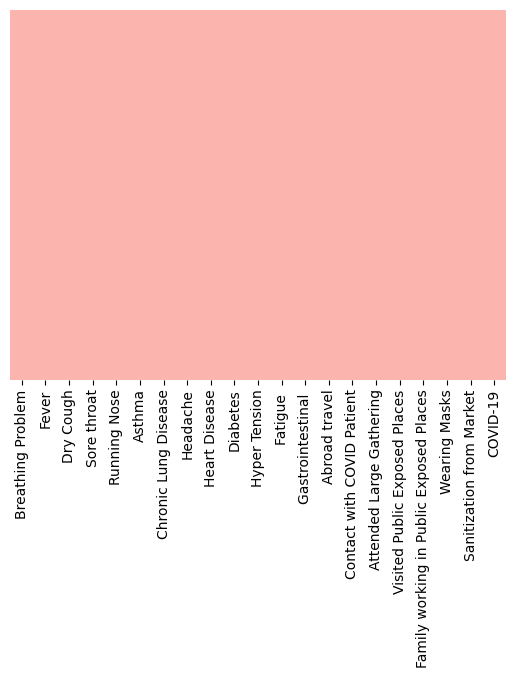

In [7]:
sns.heatmap(covid_data.isnull(),yticklabels=False,cbar=False,cmap='Pastel1')


<ipython-input-8-10afb37cd96c>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='COVID-19',data=covid_data, palette="PuRd")


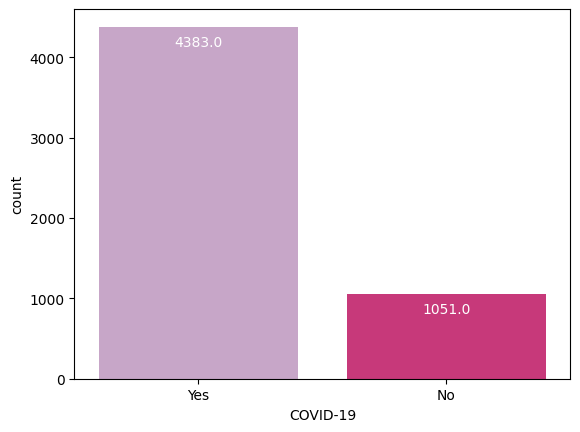

In [8]:
ax = sns.countplot(x='COVID-19',data=covid_data, palette="PuRd")
for p in ax.patches:
     ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()+100), ha='center', va='top', color='white', size=10)
plt.show()

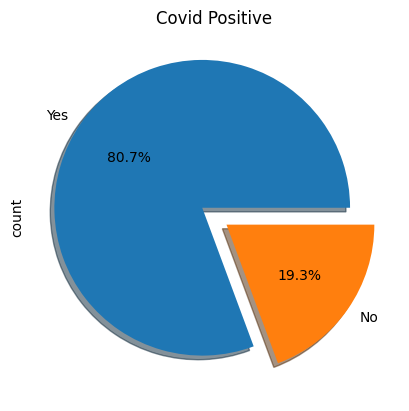

In [9]:
covid_data["COVID-19"].value_counts().plot.pie(explode=[0.1,0.1],autopct='%1.1f%%',shadow=True)
plt.title('Covid Positive');


<ipython-input-11-10854806ba23>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Breathing Problem',data=covid_data, palette="Set1")


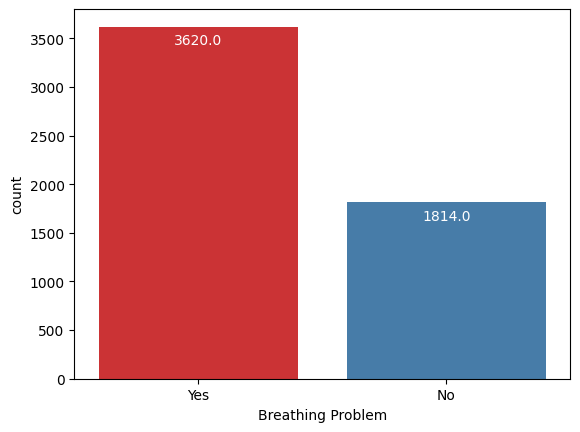

In [11]:
ax = sns.countplot(x='Breathing Problem',data=covid_data, palette="Set1")
for p in ax.patches:
     ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()+100), ha='center', va='top', color='white', size=10)
plt.show()

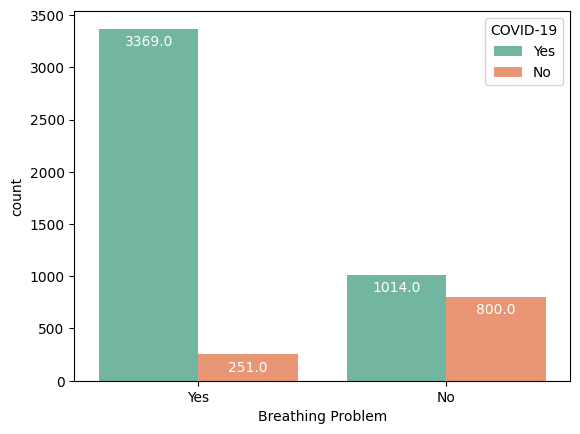

In [12]:
ax = sns.countplot(x='Breathing Problem',hue='COVID-19',data=covid_data, palette="Set2")
for p in ax.patches:
     ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()+100), ha='center', va='top', color='white', size=10)
plt.show()

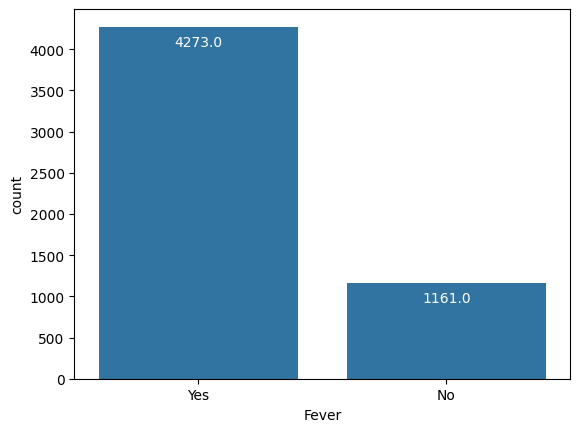

In [13]:
ax = sns.countplot(x='Fever',data=covid_data)
for p in ax.patches:
     ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()+100), ha='center', va='top', color='white', size=10)
plt.show()

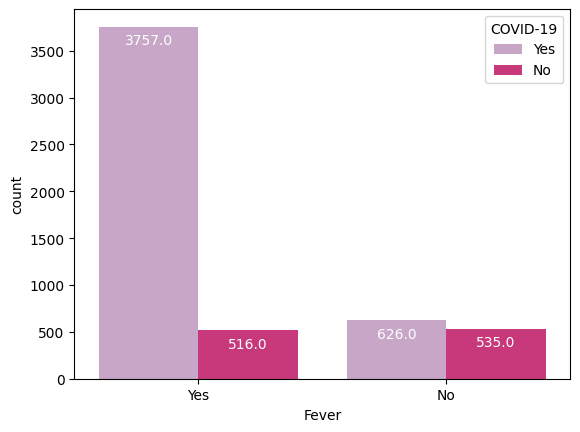

In [14]:

ax = sns.countplot(x='Fever',hue='COVID-19',data=covid_data, palette="PuRd")
for p in ax.patches:
     ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()+100), ha='center', va='top', color='white', size=10)
plt.show()



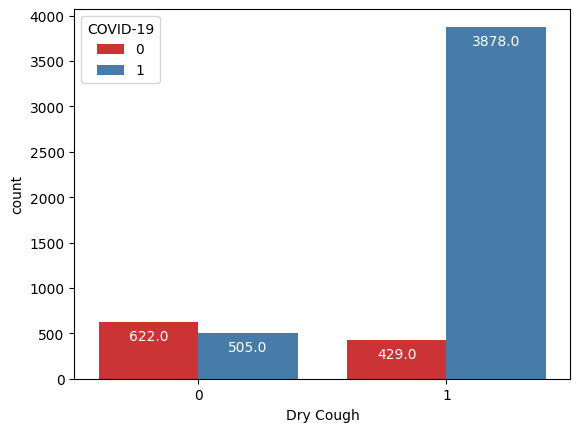

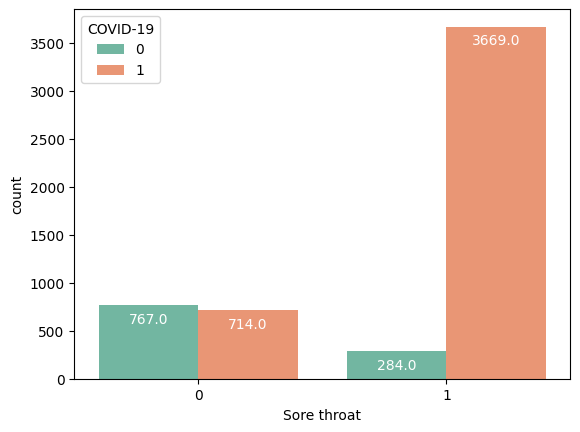

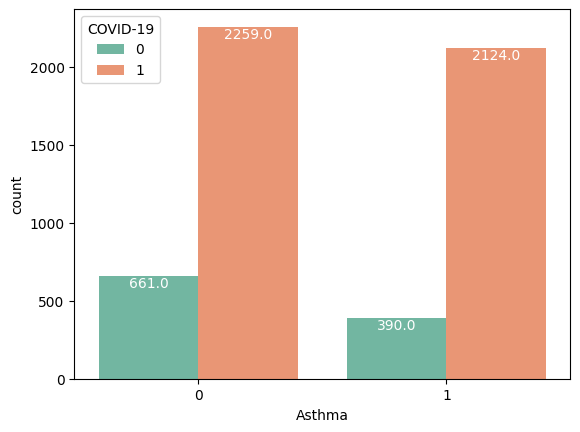

In [26]:
ax = sns.countplot(x='Dry Cough',hue='COVID-19',data=covid_data, palette="Set1")
for p in ax.patches:
     ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()+100), ha='center', va='top', color='white', size=10)
plt.show()

ax = sns.countplot(x='Sore throat',hue='COVID-19',data=covid_data, palette="Set2")
for p in ax.patches:
     ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()+100), ha='center', va='top', color='white', size=10)
plt.show()

ax = sns.countplot(x='Asthma',hue='COVID-19',data=covid_data, palette="Set2")
for p in ax.patches:
     ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()+100), ha='center', va='top', color='white', size=10)
plt.show()

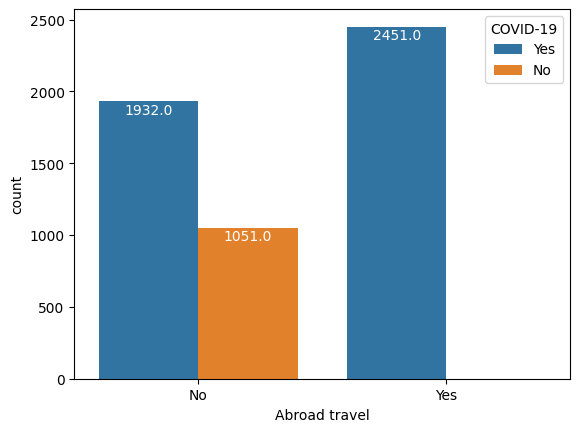

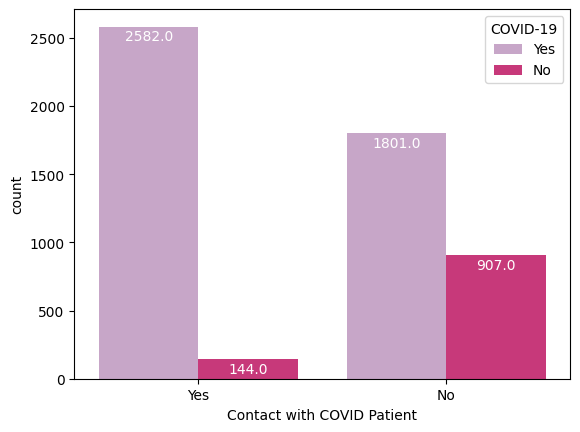

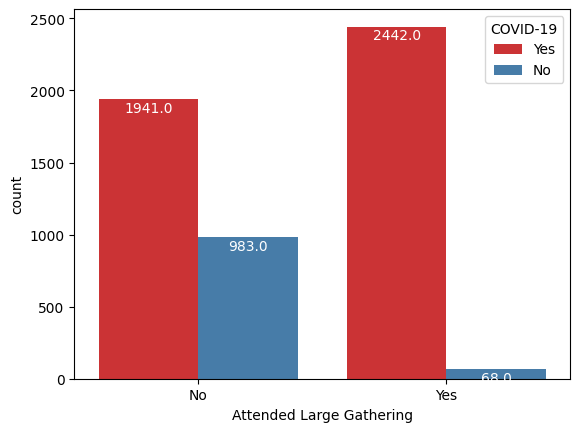

In [16]:
ax = sns.countplot(x='Abroad travel',hue='COVID-19',data=covid_data)
for p in ax.patches:
     ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()+100), ha='center', va='top', color='white', size=10)
plt.show()

ax = sns.countplot(x='Contact with COVID Patient',hue='COVID-19',data=covid_data, palette="PuRd")
for p in ax.patches:
     ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()+100), ha='center', va='top', color='white', size=10)
plt.show()

ax = sns.countplot(x='Attended Large Gathering',hue='COVID-19',data=covid_data, palette="Set1")
for p in ax.patches:
     ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()+100), ha='center', va='top', color='white', size=10)
plt.show()

In [17]:
e=LabelEncoder() # Conversion from categorical data to numerical data

covid_data['Breathing Problem']=e.fit_transform(covid_data['Breathing Problem'])
covid_data['Fever']=e.fit_transform(covid_data['Fever'])
covid_data['Dry Cough']=e.fit_transform(covid_data['Dry Cough'])
covid_data['Sore throat']=e.fit_transform(covid_data['Sore throat'])
covid_data['Running Nose']=e.fit_transform(covid_data['Running Nose'])
covid_data['Asthma']=e.fit_transform(covid_data['Asthma'])
covid_data['Chronic Lung Disease']=e.fit_transform(covid_data['Chronic Lung Disease'])
covid_data['Headache']=e.fit_transform(covid_data['Headache'])
covid_data['Heart Disease']=e.fit_transform(covid_data['Heart Disease'])
covid_data['Diabetes']=e.fit_transform(covid_data['Diabetes'])
covid_data['Hyper Tension']=e.fit_transform(covid_data['Hyper Tension'])
covid_data['Abroad travel']=e.fit_transform(covid_data['Abroad travel'])
covid_data['Contact with COVID Patient']=e.fit_transform(covid_data['Contact with COVID Patient'])
covid_data['Attended Large Gathering']=e.fit_transform(covid_data['Attended Large Gathering'])
covid_data['Visited Public Exposed Places']=e.fit_transform(covid_data['Visited Public Exposed Places'])
covid_data['Family working in Public Exposed Places']=e.fit_transform(covid_data['Family working in Public Exposed Places'])
covid_data['Wearing Masks']=e.fit_transform(covid_data['Wearing Masks'])
covid_data['Sanitization from Market']=e.fit_transform(covid_data['Sanitization from Market'])
covid_data['COVID-19']=e.fit_transform(covid_data['COVID-19'])
covid_data['Dry Cough']=e.fit_transform(covid_data['Dry Cough'])
covid_data['Sore throat']=e.fit_transform(covid_data['Sore throat'])
covid_data['Gastrointestinal ']=e.fit_transform(covid_data['Gastrointestinal '])
covid_data['Fatigue ']=e.fit_transform(covid_data['Fatigue '])

covid_data.head()

,Breathing Problem,Fever,Dry Cough,Sore throat,Running Nose,Asthma,Chronic Lung Disease,Headache,Heart Disease,Diabetes,...,Fatigue,Gastrointestinal,Abroad travel,Contact with COVID Patient,Attended Large Gathering,Visited Public Exposed Places,Family working in Public Exposed Places,Wearing Masks,Sanitization from Market,COVID-19
0,1,1,1,1,1,0,0,0,0,1,...,1,1,0,1,0,1,1,0,0,1
1,1,1,1,1,0,1,1,1,0,0,...,1,0,0,0,1,1,0,0,0,1
2,1,1,1,1,1,1,1,1,0,1,...,1,1,1,0,0,0,0,0,0,1
3,1,1,1,0,0,1,0,0,1,1,...,0,0,1,0,1,1,0,0,0,1
4,1,1,1,1,1,0,1,1,1,1,...,0,1,0,1,0,1,0,0,0,1


Wearing Masks
0    5434
Name: count, dtype: int64


<Axes: xlabel='Wearing Masks', ylabel='count'>

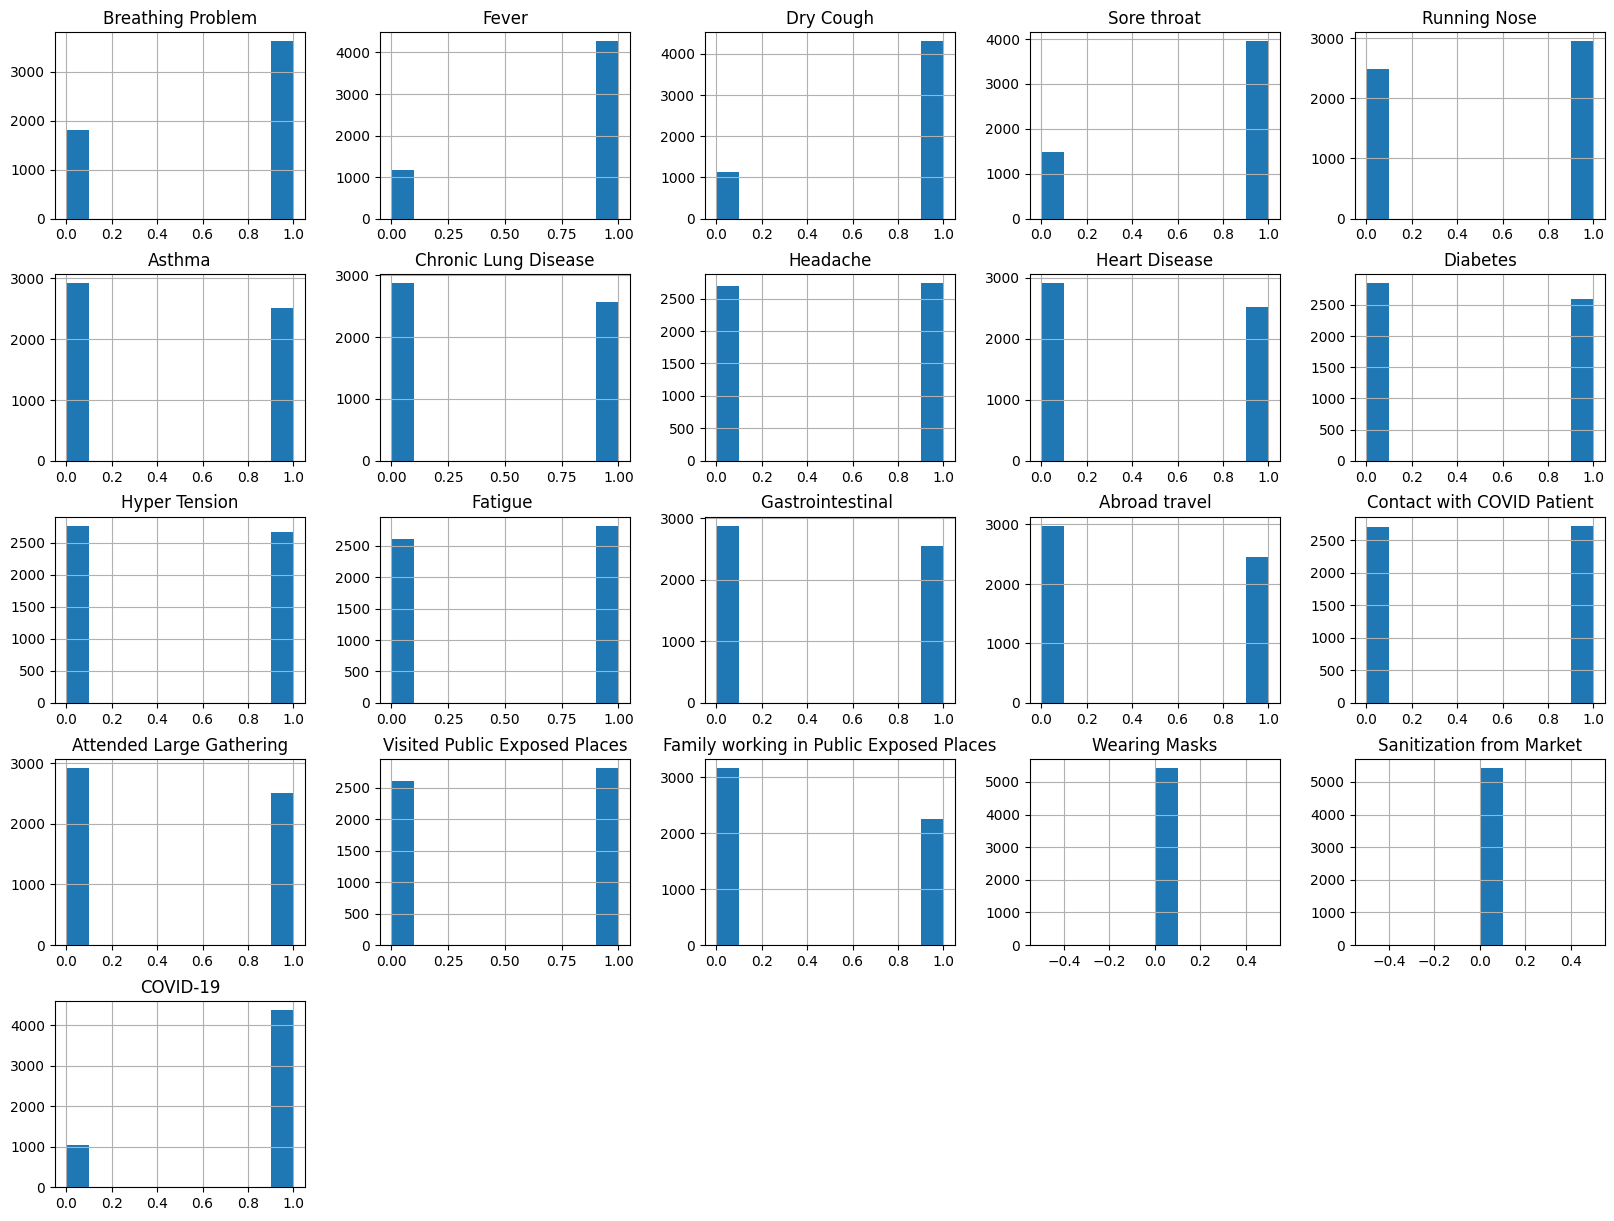

In [18]:
covid_data.hist(figsize=(20,15));

print(covid_data['Wearing Masks'].value_counts())
sns.countplot(x='Wearing Masks',data=covid_data)


Sanitization from Market
0    5434
Name: count, dtype: int64


<Axes: xlabel='Sanitization from Market', ylabel='count'>

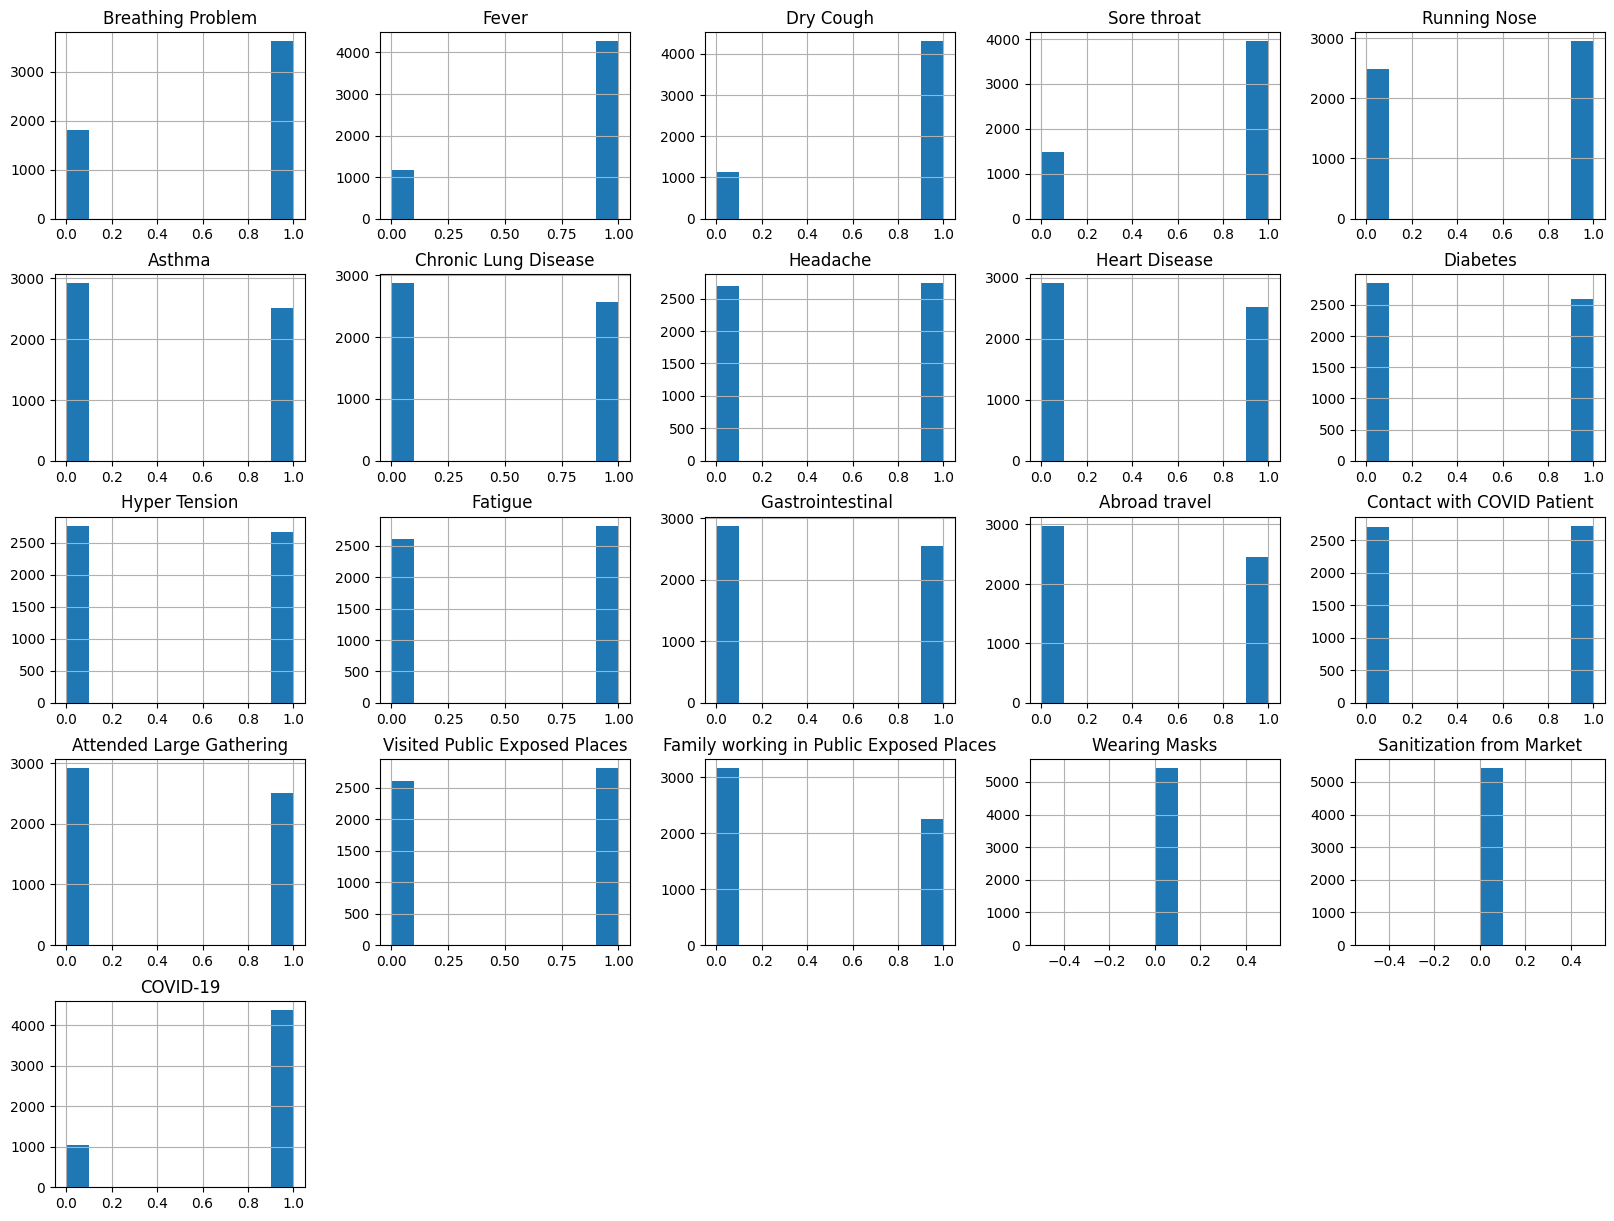

In [20]:
covid_data.hist(figsize=(20,15));
print(covid_data['Sanitization from Market'].value_counts())
sns.countplot(x='Sanitization from Market',data=covid_data)


RandomForestRegressor(random_state=42)

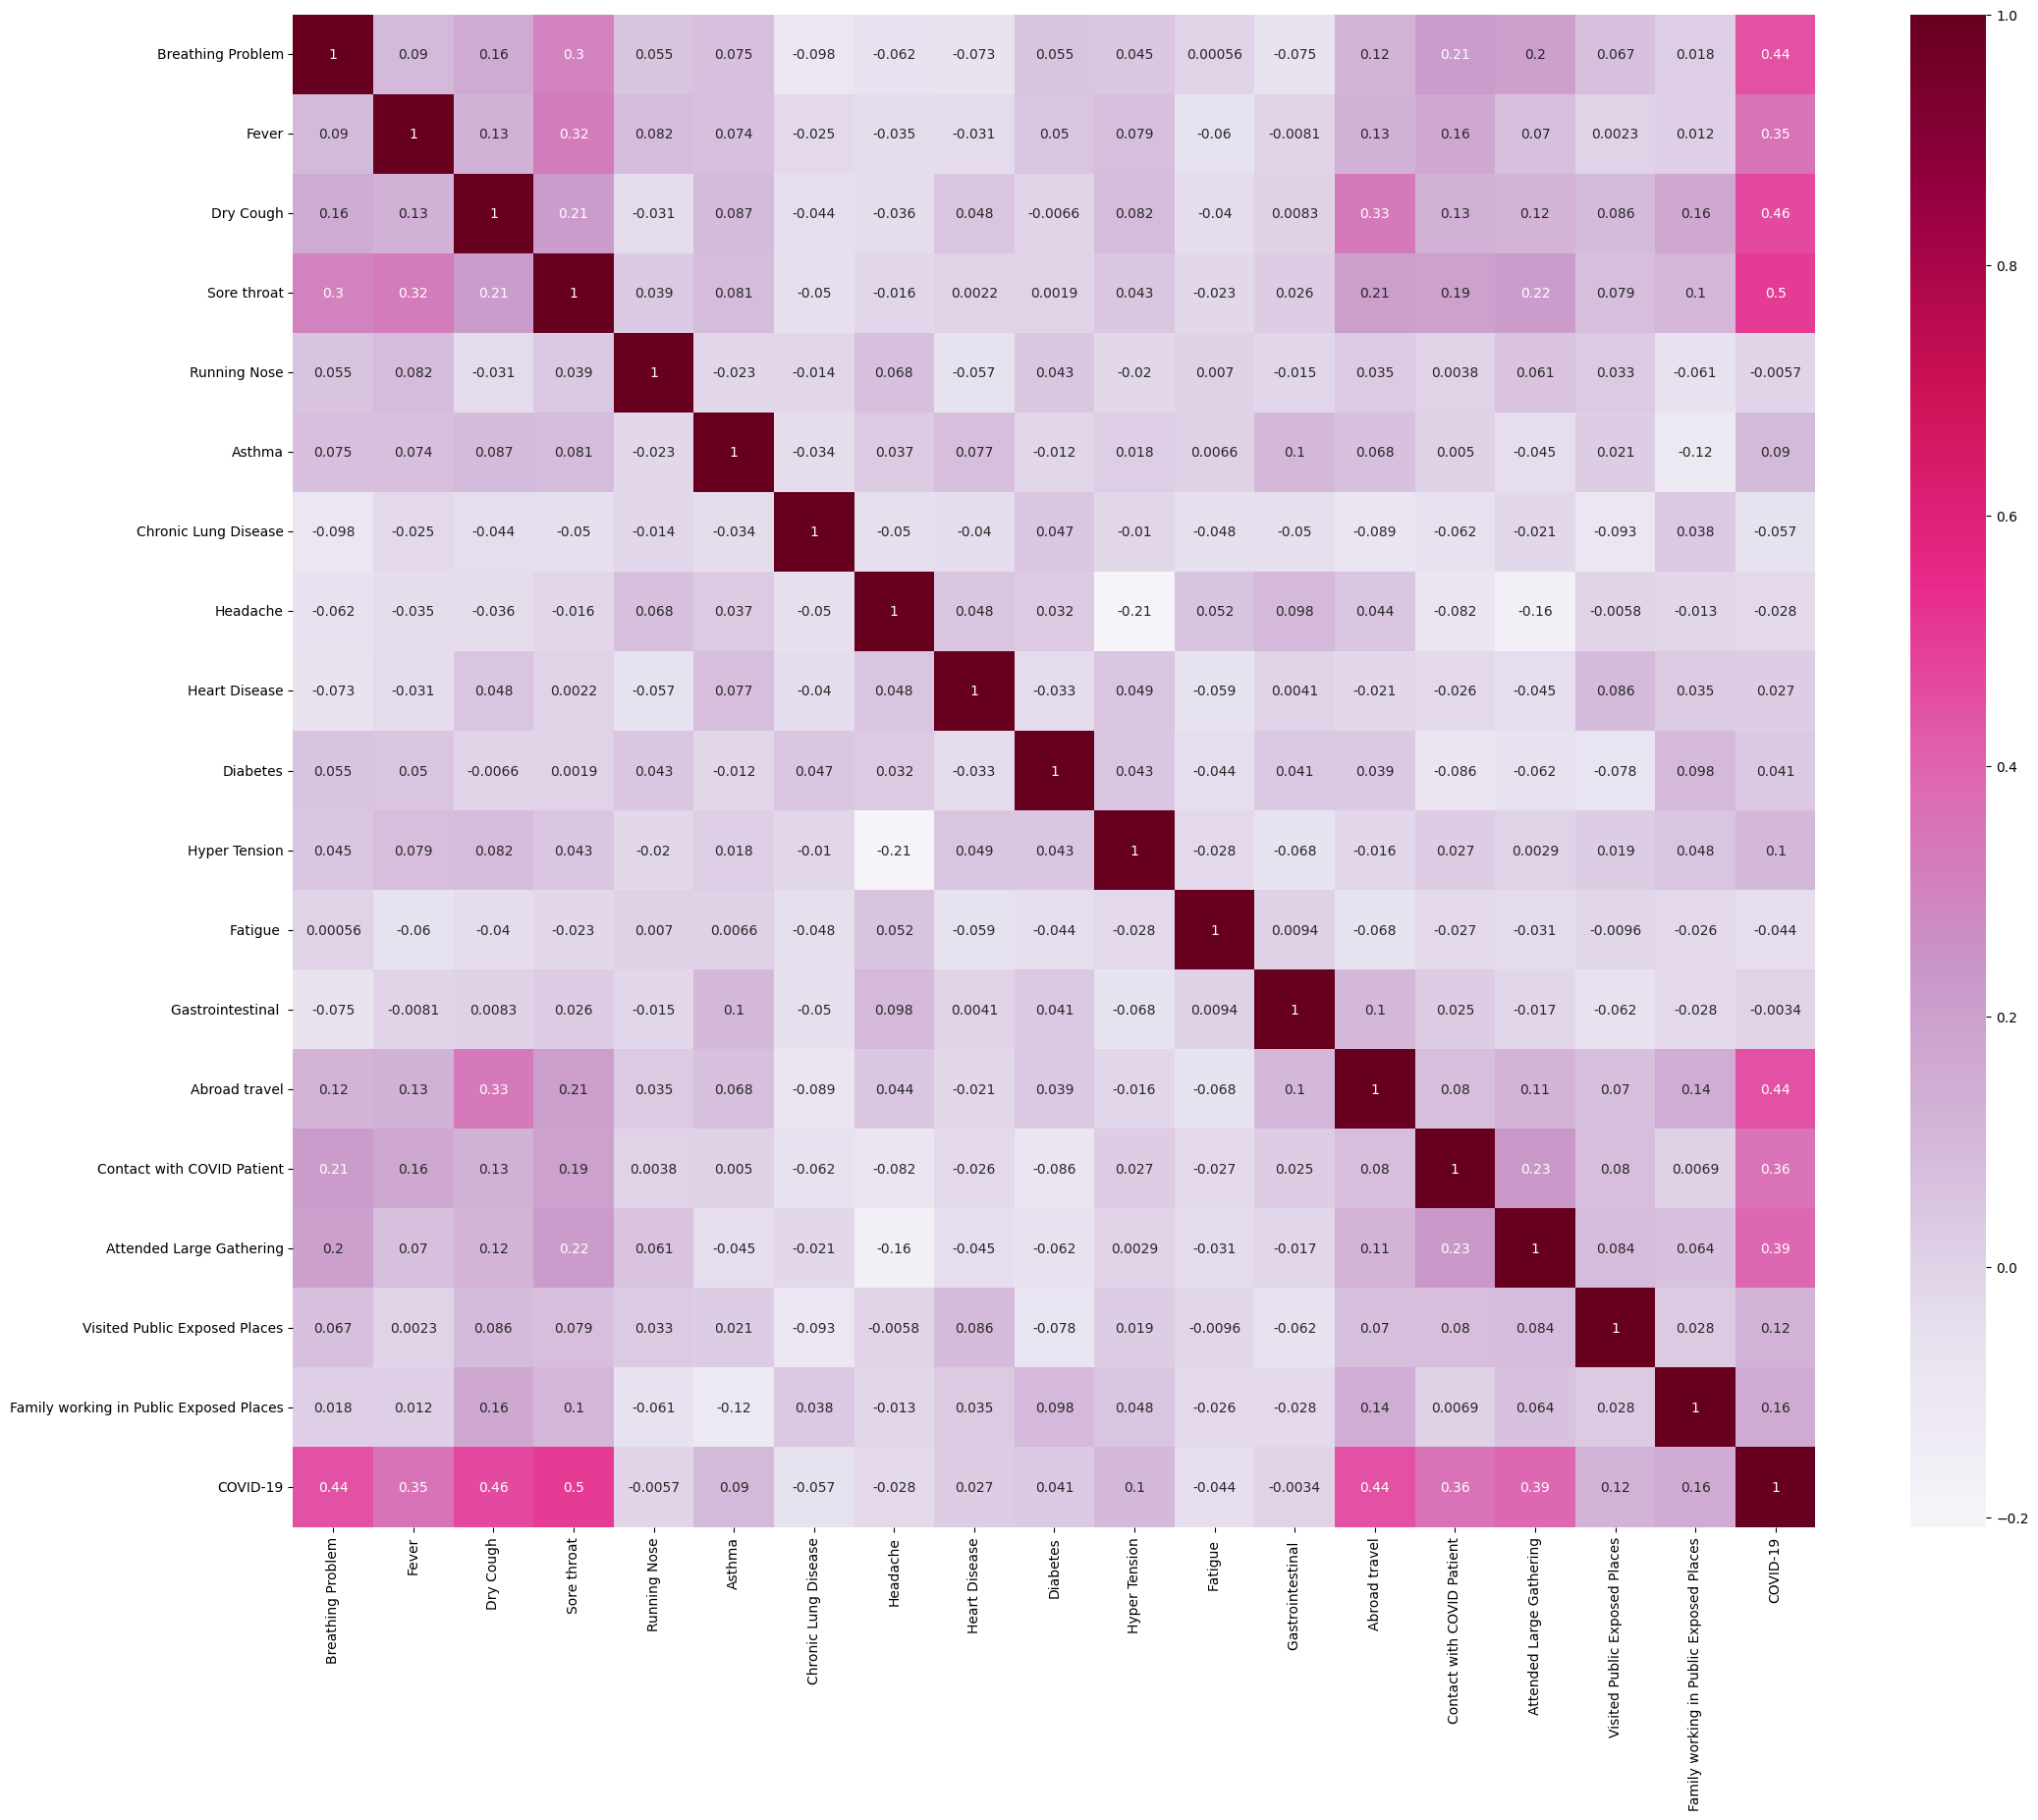

In [41]:
covid_data.columns    #showing corelation of data using matrix

plt.figure(figsize=(25,20))
sns.heatmap(covid_data.corr(), annot=True, cmap="PuRd")

x=covid_data.drop('COVID-19',axis=1)
y=covid_data['COVID-19']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 101)

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(x_train, y_train)


In [36]:
# Step 5: Predict cases and evaluate
y_pred = rf_model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)

print(f"Mean Squared Error: {mse}")


Mean Squared Error: 0.014862150356609613


In [33]:

df=pd.DataFrame({'Actual Cases': y_test, 'Predicted Cases': y_pred})
df

,Actual Cases,Predicted Cases
977,1,1.000000
2309,1,1.000000
356,1,1.000000
2478,1,1.000000
4963,0,0.000000
...,...,...
177,1,0.615102
1815,1,1.000000
4811,0,0.000000
4565,0,0.194342
